In [ ]:
https://github.com/adamwigg/mlp/blob/67a07d802066d971a515b9032f3475709534a827

In [3]:
import numpy as np
np.random.rand(1, 8)

array([[0.54071185, 0.68867268, 0.04090079, 0.89523265, 0.05274965,
        0.45178404, 0.20806419, 0.53719264]])

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

x = (0,1,0,1,1,1,1,1,0,1,0,1,0,2,0,1,0,1,0,0,0,2,0,1)
y = (0,2,1,1,2,1,0,1,0,1,1,1,1,2,0,1,0,1,0,0,1,0,0,1)

target_names = ['class 0', 'class 1']

def confusion_matrix(y_actual, y_prediction) -> pd.DataFrame:
    """Confusion matrix using the pandas crosstab - returns a dataframe"""
    df_confusion = pd.crosstab(
        pd.Series(y_actual),
        pd.Series(y_prediction),
        rownames=["Actual"],
        colnames=["Predicted"],
        margins=False,
    )
    return df_confusion

def report_result_scores(scores: dict) -> str:
    """Text summary of metrics and confusion matrix"""
    report_text = ""
    for key, value in scores.items():
        if key != "confusion_matrix":
            report_text += f"{key}: {value:.2f}\n"
    report_text += f"\nConfusion Matrix:\n{scores['confusion_matrix'].to_string()}\n"
    return report_text


def macro_accuracy(y_actual, y_prediction) -> dict:
    """Score the predictions"""
    tp = 0  # true positive
    fp = 0  # false positive
    tn = 0  # true negative
    fn = 0  # false negative
    cm = confusion_matrix(y_actual, y_prediction)
    diagonal = pd.Series(np.diag(cm), index=[cm.index, cm.columns]).tolist()
    for n in range(cm.shape[0]):
        tp += diagonal[n]
        tn += sum(diagonal) - diagonal[n]
        fn += sum(cm.iloc[n, :].tolist()) - diagonal[n]
        fp += sum(cm.iloc[:, n].tolist()) - diagonal[n]
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return accuracy

r = score(x, y)
print(report_result_scores(r))

print(classification_report(x, y, target_names=target_names))



accuracy: 0.75

Confusion Matrix:
Predicted  0  1  2
Actual            
0          7  4  0
1          1  8  2
2          1  0  1



ValueError: Number of classes, 3, does not match size of target_names, 2. Try specifying the labels parameter

Logistic Regression accuracy :  0.505
Loss  0  =  0.6931557167333594
Loss  1000  =  0.05924973506022747
Loss  2000  =  0.03689848775012151
Loss  3000  =  0.03445888719010363
Loss  4000  =  0.03060649266520345
Neural Network accuracy :  0.99


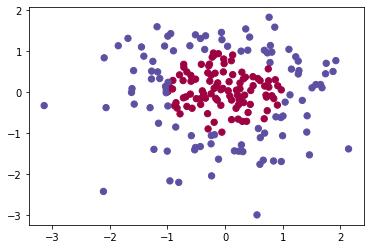

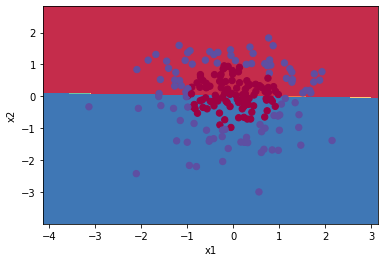

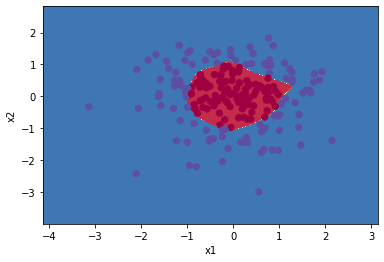

In [1]:
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt


#np.random.seed(1)

def load_data():
    N = 200
    gq = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7,
                                                  n_samples=N, n_features=2,
                                                  n_classes=2, shuffle=True,
                                                  random_state=None)
    return gq


def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

    
gaussian_quantiles = load_data()
X, Y = gaussian_quantiles


# Input Data
plt.figure("Input Data")
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)



def show_predictions(model, X, Y, name=""):
    """ display the labeled data X and a surface of prediction of model """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    X_temp = np.c_[xx.flatten(), yy.flatten()]
    Z = model.predict(X_temp)
    plt.figure("Predictions " + name)
    plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1],c=Y, s=40, cmap=plt.cm.Spectral)

    

# Logisitc Regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, Y)

show_predictions(clf, X, Y, "Logistic regression")
    
LR_predictions = clf.predict(X)
print("Logistic Regression accuracy : ", np.sum(LR_predictions == Y) / Y.shape[0])


## Neural Network
class Neural_Network:
    def __init__(self, n_in, n_hidden, n_out):
        # Network dimensions
        self.n_x = n_in
        self.n_h = n_hidden
        self.n_y = n_out
        
        # Parameters initialization
        self.W1 = np.random.randn(self.n_h, self.n_x) * 0.01
        self.b1 = np.zeros((self.n_h, 1))
        self.W2 = np.random.randn(self.n_y, self.n_h) * 0.01
        self.b2 = np.zeros((self.n_y, 1))

    def forward(self, X):
        """ Forward computation """
        self.Z1 = self.W1.dot(X.T) + self.b1
        self.A1 = np.tanh(self.Z1)
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.A2 = sigmoid(self.Z2)
    
    def back_prop(self,  X, Y):
        """ Back-progagate gradient of the loss """
        m = X.shape[0]
        self.dZ2 = self.A2 - Y
        self.dW2 = (1 / m) * np.dot(self.dZ2, self.A1.T)
        self.db2 = (1 / m) * np.sum(self.dZ2, axis=1, keepdims=True)
        self.dZ1 = np.multiply(np.dot(self.W2.T, self.dZ2), 1 - np.power(self.A1, 2))
        self.dW1 = (1 / m) * np.dot(self.dZ1, X)
        self.db1 = (1 / m) * np.sum(self.dZ1, axis=1, keepdims=True)

    def train(self, X, Y, epochs, learning_rate=1.2):
        """ Complete process of learning, alternates forward pass,
            backward pass and parameters update """
        m = X.shape[0]
        for e in range(epochs):
            self.forward(X)
            loss = -np.sum(np.multiply(np.log(self.A2), Y) + np.multiply(np.log(1-self.A2),  (1 - Y))) / m
            self.back_prop(X, Y)

            self.W1 -= learning_rate * self.dW1
            self.b1 -= learning_rate * self.db1
            self.W2 -= learning_rate * self.dW2
            self.b2 -= learning_rate * self.db2

            if e % 1000 == 0:
                print("Loss ",  e, " = ", loss)

    def predict(self, X):
        """ Compute predictions with just a forward pass """
        self.forward(X)
        return np.round(self.A2).astype(np.int)


nn = Neural_Network(2, 10, 1)
nn.train(X, Y, 5000, 1.2)

show_predictions(nn, X, Y, "Neural Network")

nn_predictions = nn.predict(X)
print("Neural Network accuracy : ", np.sum(nn_predictions == Y) / Y.shape[0])

In [8]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score

data1 = {'1':[0,1,2,3,1], '2':[0,1,2,3,1], '3':[0,1,2,3,1]}
original= pd.DataFrame(data1)

data2 = {'1':[0,1,2,3,0], '2':[1,1,2,2,1], '5':[0,1,2,3,3]}
predect1 = pd.DataFrame(data2)

# Get the set of columns of original dataset
orig_col = set(original.columns)

# Define the function to get all valeus
def get_all(pred, orig):
    # Get the set of columns in pred
    pred_col = set(pred.columns)
    # Get the columns which are present in both
    check_col = orig_col.intersection(pred_col)

    # List to return
    recalls = []
    precisions = []
    accuracies = []
   
    # iterate on each column to check
    for col in check_col:
        print(orig[col].values, pred[col].values)
        precisions.append(precision_score(orig[col].values, pred[col].values, average='macro', labels=np.unique(pred[col].values)))
        recalls.append(recall_score(orig[col].values, pred[col].values, average='macro', labels=np.unique(pred[col].values)))
        accuracies.append(accuracy_score(orig[col].values, pred[col].values))

    # return the values
    return precisions, recalls, accuracies

# Finally run the function
get_all(predect1, original)

[0 1 2 3 1] [1 1 2 2 1]
[0 1 2 3 1] [0 1 2 3 0]


([0.5833333333333333, 0.875], [1.0, 0.875], [0.6, 0.8])

In [10]:
import numpy as np
import math

mmatrix= np.array([[1,2,3],[4,5,6]])

#sigmoid function
def sigmoid(X):
   return 1/(1+np.exp(-X))
#Example with mmatrix defined above
sigmoid(mmatrix)


array([[0.73105858, 0.88079708, 0.95257413],
       [0.98201379, 0.99330715, 0.99752738]])

In [8]:
print(f"\U0001F4BB Finished.")

💻 Finished.


In [4]:
def arg_test(*args):
    for l in args:
        print(l)
    print(args)

arg_list = (
    # Layer parameters: name, nodes, activation
    ("input", 1, 4),
    ("hidden", 4, 8, 'act'),
    ("hidden", 8, 8, 'act'),
    ("output", 8, 4, 'act')
)
arg_test(arg_list)

for arg in arg_list:
    name, x_none, y_node, *act = arg
    print(name, x_none, y_node, act)


(('input', 1, 4), ('hidden', 4, 8, 'act'), ('hidden', 8, 8, 'act'), ('output', 8, 4, 'act'))
((('input', 1, 4), ('hidden', 4, 8, 'act'), ('hidden', 8, 8, 'act'), ('output', 8, 4, 'act')),)
input 1 4 []
hidden 4 8 ['act']
hidden 8 8 ['act']
output 8 4 ['act']


In [20]:
import pandas as pd
import csv
df = pd.read_csv("data/iris_str.csv", header=0, delimiter=',') 
classes = df.iloc[:,-1].unique().tolist()
df.iloc[:,-1] = df.iloc[:,-1].apply(lambda c: classes.index(c))
new_data = df.to_numpy()

new_data

array([[4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.6, 0.2, 0. ],
       [4.8, 3

In [1]:
import itertools

l1 = ['a', 'b', 'c']
l2 = [1]
l3 = ['zz', 'yy']

itertools.product(*[l1, l2, l3])


In [5]:
import numpy as np

target = np.array(['dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 
    'cat', 'cat', 'hamster', 'hamster'])

def one_hot(array):
    unique, inverse = np.unique(array, return_inverse=True)
    print(unique, type(unique))
    onehot = np.eye(unique.shape[0])[inverse]
    return onehot

print(one_hot(target))
print(type(one_hot(target)))

['cat' 'dog' 'hamster'] <class 'numpy.ndarray'>
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
['cat' 'dog' 'hamster'] <class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
class Dataset:
    """
    Contains a set of data and the test, train, validation sets.
    """
    data: 'np.ndarray[float]' = []
    target_idx: int = -1  # Default to last

    def __repr__(self) -> str:
        """Pretty string of an array"""
        return np.array2string(self.data, formatter={'float_kind':lambda x: "%.4f" % x})


In [2]:
config = {
    # Setup
    "data_file": 'data/my_data.csv',  # Relative filepath to csv file
    "data_seperator": ' ',  # Usually ' ' or ','
    "header_rows": 0,  # Number of rows to ignore at start of file for header
    "random_seed": 2021,  # Used to initiate the numpy random generator

    # Dataset
    "train_test_split": (.33, .33), # val is remaining, if test = 0 will use '66/33' method
    "target": -1,  # Target index, -1 being last column
    "normalize_values": (-1, 1),  # Min and Max values
    "normalize_range": (0, -1),  # Index range to normalize, 'None' to skip normalisation

    # Model settings
    "input_nodes": 12,  # Number of input values (features)
    "output_nodes": 3,  # Number of output values (classes)
    "hidden_layers": 2,  # Number of hidden layers
    "activator": 'ann.Softmax',  # alternatives: ann.Relu, ann.Sigmoid

    # Parameters - multiple values in the list create a grid search
    "eta": [0.1],  # Training rate
    "hidden_nodes": [8],  # Hidden nodes
    "max_epochs": [150],  # Number of epochs to train
}

print(config)

{'data_file': 'data/my_data.csv', 'data_seperator': ' ', 'header_rows': 0, 'random_seed': 2021, 'train_test_split': (0.33, 0.33), 'target': -1, 'normalize_values': (-1, 1), 'normalize_range': (0, -1), 'input_nodes': 12, 'output_nodes': 3, 'hidden_layers': 2, 'activator': 'ann.Softmax', 'eta': [0.1], 'hidden_nodes': [8], 'max_epochs': [150]}
